# Exploratory Data Analysis on Insurance

dataset : https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance

---




## In this python notebook, analysis is done on the relationship between personal attributes and medical insurance charges using data analysis python packages like pandas and matplotlib.

## Loading the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/insurance.csv")

## Understanding the Data

In [2]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
print(f"The insurance data set has {df.shape[0]} rows and {df.shape[1]} columns")

The insurance data set has 1338 rows and 7 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The dataset does not contain any null values. All the data types are as expected. We might need to keep in mind the columns with 'object' data types while performing analysis on them

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

## EDA

### Age vs Insurance cost

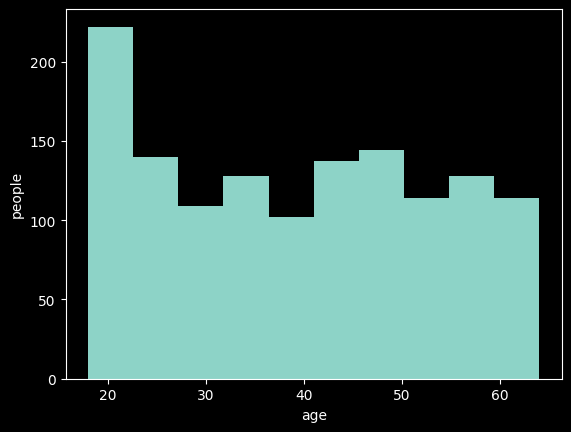

In [8]:
plt.style.use('dark_background')
plt.hist(df.age, bins=10)
plt.xlabel('age')
plt.ylabel('people')
plt.show()

The data is evenly distributed among age groups, with a slight overrepresentation around the 20 age group.

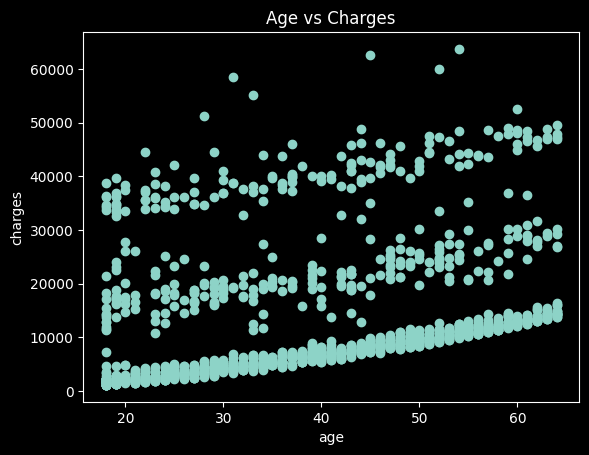

In [9]:
plt.scatter(df.age, df.charges)
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Age vs Charges');

In [10]:
df.age.corr(df.charges)

0.29900819333064754

There is a weak positive correlation between age and insurance cost

### Sex vs Insurance cost

In [11]:
df.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

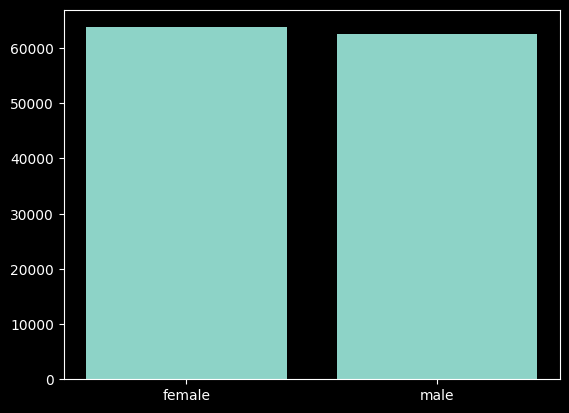

In [12]:
plt.bar(df.sex, df.charges);

From the graph we can see that the charges for both males and females is almost the same

### Exploring BMI in the population

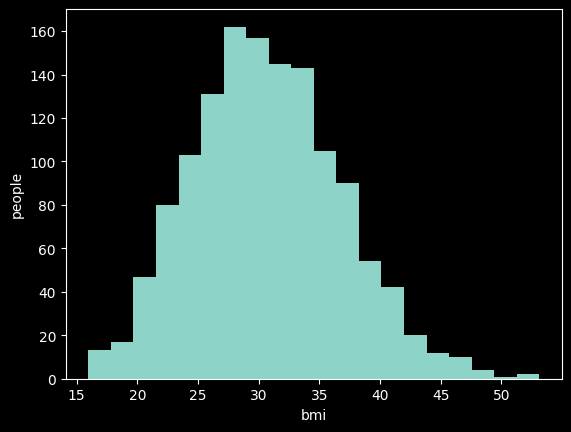

In [13]:
plt.hist(df.bmi, bins=20)
plt.xlabel('bmi')
plt.ylabel('people')
plt.show()

The bmi follows a normal distribution, which is to be expected

In [14]:
df.age.corr(df.bmi)

0.1092718815485352

There is a very weak correlation between age and bmi

### Smoking vs Insurance Cost

In [15]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

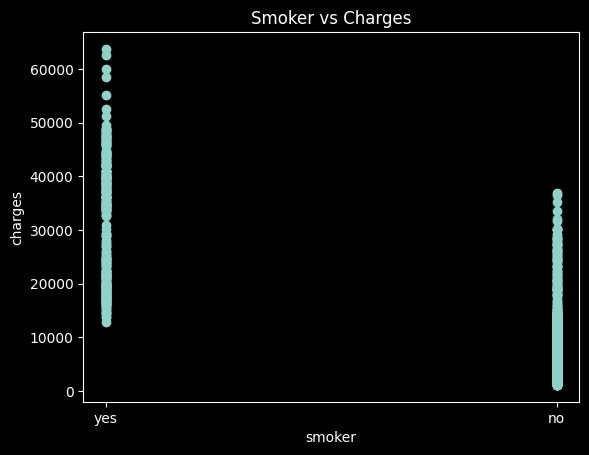

In [16]:
plt.scatter(df.smoker, df.charges)
plt.xlabel('smoker')
plt.ylabel('charges')
plt.title('Smoker vs Charges');

In [17]:
smoker_charges = df[df.smoker == 'yes'].charges.mean()
print("Avg charges of smokers:", smoker_charges)

Avg charges of smokers: 32050.23183153284


In [18]:
nonsmoker_charges = df[df.smoker == 'no'].charges.mean()
print("Avg charges of non-smokers:", nonsmoker_charges)

Avg charges of non-smokers: 8434.268297856204


In [19]:
print(f"Somkers are paying, on average, {(smoker_charges - nonsmoker_charges)/100 + 100}% more than non-smokers")

Somkers are paying, on average, 336.15963533676637% more than non-smokers


In [20]:
def yn(x):
    if x == 'yes':
        return 1
    return 0

In [21]:
df['smoke_yes'] = df.smoker.apply(yn)

We convert the yes/no values to the numeric 1/0, for statistical analysis

In [22]:
df.smoke_yes.corr(df.charges)

0.7872514304984779

#### 0.787 indicates a strong correlation between whether a person smokes and their insurance charges

### Family Size vs Insurance Cost:

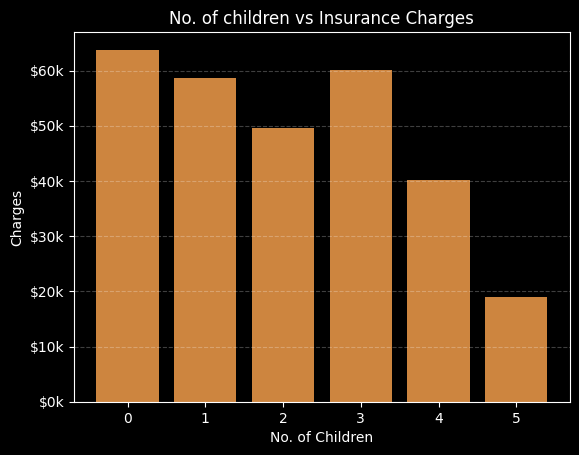

In [23]:
plt.bar(df.children, df.charges, color='peru')
plt.xlabel('No. of Children')
plt.ylabel('Charges')
plt.title('No. of children vs Insurance Charges')
plt.grid(axis='y', linestyle='--', alpha=0.25)

def currency_formatter(x, pos):
    return f"${int(x/1000)}k"
plt.gca().yaxis.set_major_formatter(currency_formatter)

There is some unusual trends here. We need to explore this more, as there might be some lurking variables

In [24]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

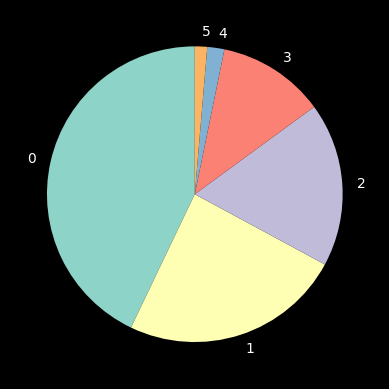

In [57]:
plt.pie(df.children.value_counts(), labels=['0','1','2','3','4','5'], startangle=90);

We see that the number of people surveyed decreases as the number of children go up

In [25]:
pd.pivot_table(df, values='charges', index='children')

,charges
children,
0,12365.975602
1,12731.171832
2,15073.563734
3,15355.318367
4,13850.656311
5,8786.035247


In [26]:
no_of_children_vs_charges = pd.pivot_table(df, values='charges', index='children').reset_index(drop=True)
no_of_children_vs_charges

,charges
0,12365.975602
1,12731.171832
2,15073.563734
3,15355.318367
4,13850.656311
5,8786.035247


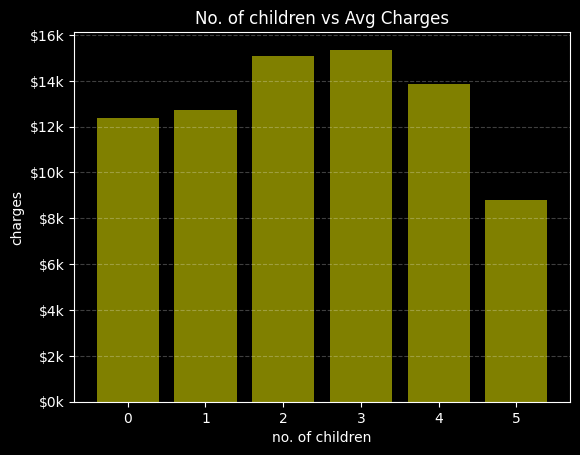

In [27]:
plt.bar(no_of_children_vs_charges.index, no_of_children_vs_charges.charges, color='olive')
plt.xlabel('no. of children')
plt.ylabel('charges')
plt.title('No. of children vs Avg Charges')
plt.gca().yaxis.set_major_formatter(currency_formatter)
plt.grid(axis='y', linestyle='--', alpha=0.25)

In [28]:
df.children.corr(df.charges)

0.0679982268479048

Upon further analyis we find that there is almost no correlation between the number of children and the insurance costs

### Region Based Analysis

In [29]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [30]:
region_charges_mean = df.groupby('region')['charges'].mean()

In [31]:
region_charges_mean

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

In [32]:
highest_cost_region = region_charges_mean.idxmax()
lowest_cost_region = region_charges_mean.idxmin()

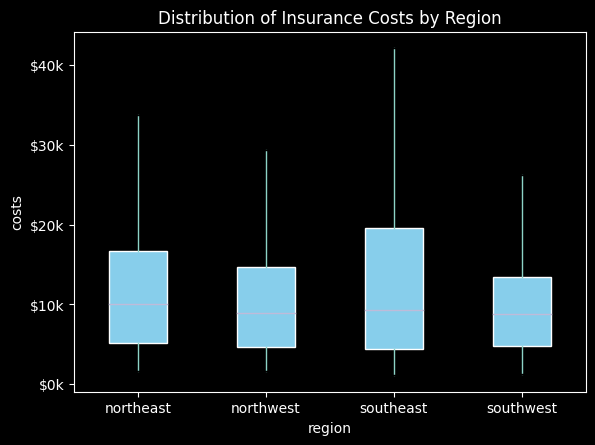

In [63]:
df.boxplot(column='charges', by='region', grid=False, patch_artist=True, showfliers=False, boxprops=dict(facecolor='skyblue'))
plt.title('Distribution of Insurance Costs by Region')
plt.ylabel('costs')
plt.gca().yaxis.set_major_formatter(currency_formatter)
plt.suptitle('');

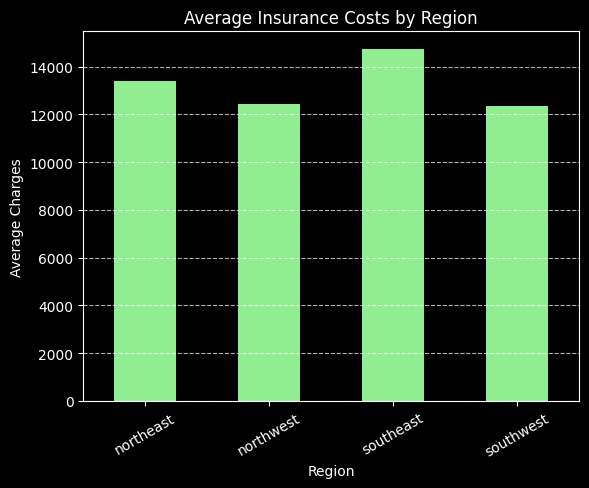

In [67]:
region_charges_mean.plot(kind='bar', color='lightgreen')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.title('Average Insurance Costs by Region')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=30);

### BMI vs Insurance

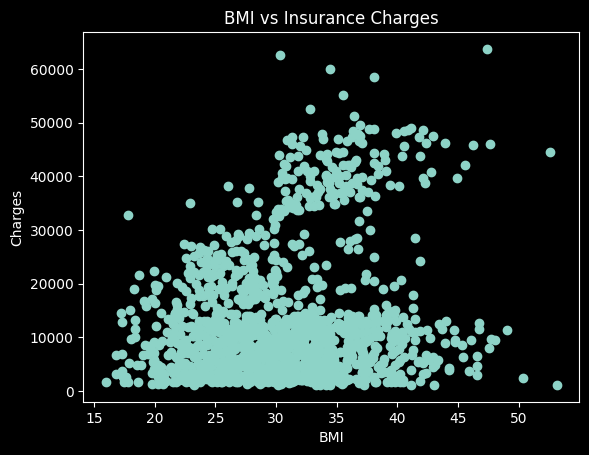

In [35]:
plt.scatter(df.bmi, df.charges)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Insurance Charges');

In [36]:
df.bmi.corr(df.charges)

0.19834096883362895

There a weak correlation between the number of children and the insurance costs

### Conclusion

In this exploratory data analysis (EDA) of the insurance dataset comprising 1338 records and 7 variables, we delved into several key aspects affecting insurance charges. Here's a summary of our findings:

1. Age and Insurance Cost:
   - The data exhibits a uniform distribution across age groups, with a slight concentration around the 20s.
   - Although there is a weak positive correlation between age and insurance costs, it's not a predominant factor influencing charges.

<br>

2. Sex and Insurance Cost:
   - Charges for males and females appear comparable, indicating that gender is not a significant determinant of insurance expenses in this dataset.

<br>

3. BMI and Insurance Cost:
   - BMI follows a normal distribution within the population.
   - There exists a weak correlation between age and BMI, suggesting that age doesn't strongly influence a person's body mass index.

<br>

4. Smoking and Insurance Cost:
   - Smokers pay significantly higher insurance charges compared to non-smokers, with an average increase of approximately 336%.
   - Smoking habits exhibit a strong positive correlation with insurance costs, indicating that smokers tend to face substantially higher charges.

<br>

5. Family Size and Insurance Cost:
   - The number of people surveyed decreases as the number of children in a family increase.
   - There's almost no correlation between the number of children and insurance costs, indicating that family size isn't a major factor impacting charges.

<br>

6. Region-Based Analysis:
   - Insurance charges vary based on the region, with the highest average charges in the southeast and the lowest in the northwest.
   - This regional disparity highlights the importance of geographical location in determining insurance costs.

<br>

7. BMI vs Insurance:
   - A weak correlation exists between BMI and insurance charges, suggesting that while there's a connection, it's not a strong one.

<br>

General Conclusions:
- Smoking habit stands out as the most influential factor affecting insurance charges in this dataset. Smokers are consistently charged significantly higher payments, emphasizing the importance of lifestyle choices in determining insurance costs.
- Age, gender, BMI, number of children, and region play relatively minor roles in comparison to smoking habits. While they do contribute to the variance in charges, they are not as defining as the choice to smoke.
- Geographical location, represented by regions, also plays a visible impact, indicating that regional factors such as healthcare infrastructure or local regulations might influence insurance pricing.

This EDA provides valuable insights for insurance companies, policyholders, and healthcare providers to understand the key factors impacting insurance charges. Further analyses and machine learning modeling could delve deeper into these relationships, providing more precise predictions for insurance pricing based on individual attributes
